### import packages

In [2]:
import os
from osgeo import gdal
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import rasterio

### Crop Main file MULSPEC

In [3]:
def main_to_mulspec(output_folder, blue_tif,green_tif, red_tif, red_edge_tif,nir_tif, lbl_name):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    print(">>>> PROCESS START <<<<")

    # Process each group to create multispectral images
    

    # Define band names and paths
    bands = {
        "Blue": blue_tif,
        "Green": green_tif,
        "Red": red_tif,
        "RedEdge": red_edge_tif,
        "NIR": nir_tif
    }

    # Open each band as a GDAL dataset
    datasets = {name: gdal.Open(path) for name, path in bands.items()}

    # Check that all bands have the same dimensions
    width = datasets["Blue"].RasterXSize
    height = datasets["Blue"].RasterYSize

    for name, dataset in datasets.items():
        if dataset.RasterXSize != width or dataset.RasterYSize != height:
            raise ValueError(f"Band {name} in does not have the same dimensions!")
        
    # Create output file
    output_file = os.path.join(output_folder, f"{lbl_name}_main.tif")
    driver = gdal.GetDriverByName("GTiff")
    output = driver.Create(output_file, width, height, len(bands), gdal.GDT_Float32)

    # Write each band to the output file with proper labeling
    for i, (name, dataset) in enumerate(datasets.items(), start=1):
        print(f"Stage {lbl_name}: Writing band {name} to output file as layer {i}...")
        band_data = dataset.GetRasterBand(1).ReadAsArray()
        output.GetRasterBand(i).WriteArray(band_data)
        output.GetRasterBand(i).SetDescription(name)  # Set band label (metadata)

    # Save and close the output file
    output.FlushCache()
    del output
    print(f"Stage {lbl_name}: Multispectral image saved to: {output_file}")

    print("All multispectral images have been processed.")

####  Create Main images

In [ ]:
from pathlib import Path
base = Path('../../data/Crop')
germination_path = os.path.join(base, 'germination')
grand_growth_path = os.path.join(base, 'grand_growth')
ripening_path = os.path.join(base, 'ripening')
tillering_path = os.path.join(base, 'tillering')

output_base = Path('../../data/MULTISPECTRAL/')

In [ ]:
# germination

# define output folder
output = os.path.join(output_base, 'germination/crop_main')

#define bands
blue_tif = os.path.join(germination_path, 'blue.tif')
green_tif = os.path.join(germination_path, 'green.tif')
red_tif = os.path.join(germination_path, 'red.tif')
red_edge_tif = os.path.join(germination_path, 'red_edge.tif')
nir_tif = os.path.join(germination_path, 'nir.tif')

# Call fun
main_to_mulspec(output_folder=output, blue_tif=blue_tif, green_tif=green_tif, red_tif=red_tif, red_edge_tif=red_edge_tif, nir_tif=nir_tif, lbl_name="germination")


In [5]:
# tillering

# define output folder
output = os.path.join(output_base, 'tillering/crop_main')

#define bands
blue_tif = os.path.join(tillering_path, 'blue.tif')
green_tif = os.path.join(tillering_path, 'green.tif')
red_tif = os.path.join(tillering_path, 'red.tif')
red_edge_tif = os.path.join(tillering_path, 'red_edge.tif')
nir_tif = os.path.join(tillering_path, 'nir.tif')


# Call fun
main_to_mulspec(output_folder=output, blue_tif=blue_tif, green_tif=green_tif, red_tif=red_tif, red_edge_tif=red_edge_tif, nir_tif=nir_tif, lbl_name="tillering")

>>>> PROCESS START <<<<
Stage tillering: Writing band Blue to output file as layer 1...
Stage tillering: Writing band Green to output file as layer 2...
Stage tillering: Writing band Red to output file as layer 3...


c:\Users\user\anaconda3\envs\research_env\lib\site-packages\osgeo\gdal.py:311: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


Stage tillering: Writing band RedEdge to output file as layer 4...
Stage tillering: Writing band NIR to output file as layer 5...
Stage tillering: Multispectral image saved to: ..\data\MULTISPECTRAL\tillering/crop_main\tillering_main.tif
All multispectral images have been processed.


In [10]:
# grand_growth

# define output folder
output = os.path.join(output_base, 'grand_growth/crop_main')

#define bands
blue_tif = os.path.join(grand_growth_path, 'blue.tif')
green_tif = os.path.join(grand_growth_path, 'green.tif')
red_tif = os.path.join(grand_growth_path, 'red.tif')
red_edge_tif = os.path.join(grand_growth_path, 'red_edge.tif')
nir_tif = os.path.join(grand_growth_path, 'nir.tif')

# Call fun
main_to_mulspec(output_folder=output, blue_tif=blue_tif, green_tif=green_tif, red_tif=red_tif, red_edge_tif=red_edge_tif, nir_tif=nir_tif, lbl_name="grand_growth")

>>>> PROCESS START <<<<
Stage grand_growth: Writing band Blue to output file as layer 1...
Stage grand_growth: Writing band Green to output file as layer 2...
Stage grand_growth: Writing band Red to output file as layer 3...
Stage grand_growth: Writing band RedEdge to output file as layer 4...
Stage grand_growth: Writing band NIR to output file as layer 5...
Stage grand_growth: Multispectral image saved to: ..\data\MULTISPECTRAL\grand_growth/crop_main\grand_growth_main.tif
All multispectral images have been processed.


In [11]:
# ripening

# define output folder
output = os.path.join(output_base, 'ripening/crop_main')

#define bands
blue_tif = os.path.join(ripening_path, 'blue.tif')
green_tif = os.path.join(ripening_path, 'green.tif')
red_tif = os.path.join(ripening_path, 'red.tif')
red_edge_tif = os.path.join(ripening_path, 'red_edge.tif')
nir_tif = os.path.join(ripening_path, 'nir.tif')

# Call fun
main_to_mulspec(output_folder=output, blue_tif=blue_tif, green_tif=green_tif, red_tif=red_tif, red_edge_tif=red_edge_tif, nir_tif=nir_tif, lbl_name="ripening")

>>>> PROCESS START <<<<
Stage ripening: Writing band Blue to output file as layer 1...
Stage ripening: Writing band Green to output file as layer 2...
Stage ripening: Writing band Red to output file as layer 3...
Stage ripening: Writing band RedEdge to output file as layer 4...
Stage ripening: Writing band NIR to output file as layer 5...
Stage ripening: Multispectral image saved to: ..\data\MULTISPECTRAL\ripening/crop_main\ripening_main.tif
All multispectral images have been processed.


#### Devide images in 64 x 64 pixels patches

>- load packeges

In [45]:
import rasterio
import numpy as np
import os
import matplotlib.pyplot as plt
from pathlib import Path

>- Define operation functions

In [46]:
def load_geotiff(image_path):
    """Load a multispectral GeoTIFF image using rasterio."""
    with rasterio.open(image_path) as src:
        image = src.read()  # Reads all bands into a NumPy array
        profile = src.profile  # Save profile for GeoTIFF metadata
    return image, profile

In [47]:
def extract_patches(image, patch_size=64):
    """Divide a multispectral image into non-overlapping patches."""
    bands, h, w = image.shape  # Get bands, height, and width
    patches = []

    for i in range(0, h, patch_size):
        for j in range(0, w, patch_size):
            if i + patch_size <= h and j + patch_size <= w:  # Ensure patch fits
                patch = image[:, i:i+patch_size, j:j+patch_size]  # Extract patch
                patches.append(patch)
    
    return patches

In [48]:
def save_patches(patches, profile, output_dir="patches"):
    """Save extracted patches as separate GeoTIFF files."""
    os.makedirs(output_dir, exist_ok=True)

    for idx, patch in enumerate(patches):
        patch_filename = os.path.join(output_dir, f"patch_{idx}.tif")
        
        # Update profile for new patch size
        patch_profile = profile.copy()
        patch_profile.update({
            "height": patch.shape[1],
            "width": patch.shape[2],
            "count": patch.shape[0]
        })

        # Save patch as GeoTIFF
        with rasterio.open(patch_filename, "w", **patch_profile) as dst:
            dst.write(patch)

In [51]:
def visualize_patches(patches, num_patches_to_show=5):
    """Display random patches."""
    fig, axes = plt.subplots(1, num_patches_to_show, figsize=(15, 5))

    for ax in axes:
        idx = np.random.randint(0, len(patches))  # Pick random patch
        patch = patches[idx]
        
        # Convert to grayscale for visualization (show only the first band)
        patch_display = patch[0, :, :] if patch.shape[0] > 1 else patch.squeeze()
        
        ax.imshow(patch_display, cmap="gray")
        ax.axis("off")

    plt.show()

In [50]:
def main(image_path, save_dir):
    """Main function to process a GeoTIFF image."""
    image, profile = load_geotiff(image_path)
    patches = extract_patches(image)
    save_patches(patches, profile, output_dir=save_dir)
    visualize_patches(patches)

>- Load the multispectral image

In [ ]:
base = Path('../../data/MULTISPECTRAL')

germination_path =Path(os.path.join(base, 'germination/crop_main/germination_main.tif'))

grand_growth_path = os.path.join(base, 'grand_growth/crop_main/grand_growth_main.tif')

ripening_path = os.path.join(base, 'ripening/crop_main/ripening_main.tif')

tillering_path = os.path.join(base, 'tillering/crop_main/tillering_main.tif')

output_base = Path('../../data/MULTISPECTRAL/')

>- Create Patches
>>- germination

c:\Users\user\anaconda3\envs\research_env\lib\site-packages\rasterio\__init__.py:368: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
c:\Users\user\anaconda3\envs\research_env\lib\site-packages\rasterio\__init__.py:378: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


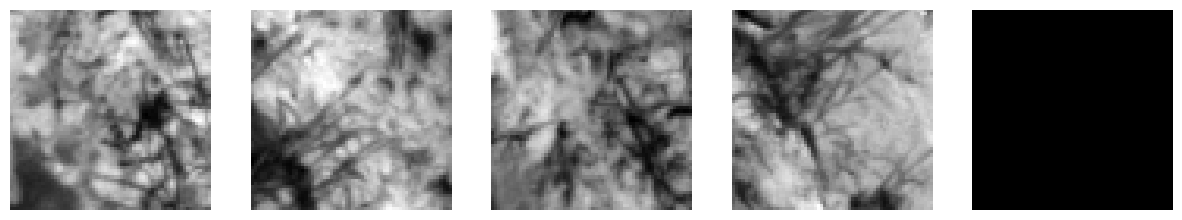

In [56]:
output_dir = Path(os.path.join(output_base, 'germination/patches'))
main(germination_path,output_dir)

>>- grand_growth

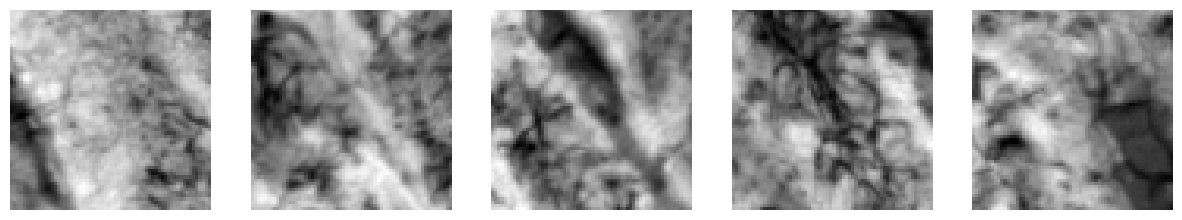

In [57]:
output_dir = Path(os.path.join(output_base, 'grand_growth/patches'))
main(germination_path,output_dir)

>>- ripening

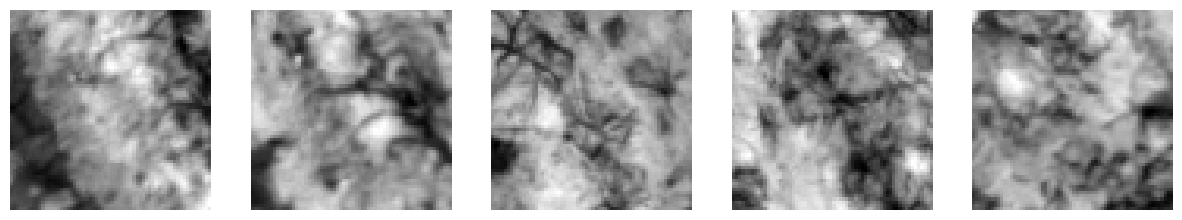

In [58]:
output_dir = Path(os.path.join(output_base, 'ripening/patches'))
main(germination_path,output_dir)

>>- tillering

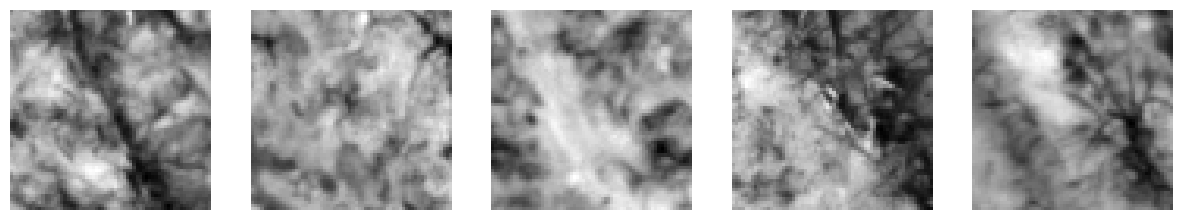

In [59]:
output_dir = Path(os.path.join(output_base, 'tillering/patches'))
main(germination_path,output_dir)